# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 586


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [20]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | invercargill
Processing Record 2 of Set 1 | puerto baquerizo moreno
Processing Record 3 of Set 1 | inirida
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | badger
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | ribeira grande
Processing Record 8 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 9 of Set 1 | iskateley
Processing Record 10 of Set 1 | saudarkrokur
Processing Record 11 of Set 1 | stephenville
Processing Record 12 of Set 1 | mejit
Processing Record 13 of Set 1 | melfi
Processing Record 14 of Set 1 | hobyo
Processing Record 15 of Set 1 | altai
Processing Record 16 of Set 1 | havre
Processing Record 17 of Set 1 | kathu
Processing Record 18 of Set 1 | jackson
Processing Record 19 of Set 1 | tharangambadi
Processing Record 20 of Set 1 | cockburn town
Processing Record 21 of Set 1 | nukunonu
City not found. Skipping...
Processing R

In [21]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [22]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,invercargill,-46.4000,168.3500,10.97,89,44,1.97,NZ,1705485403
1,puerto baquerizo moreno,-0.9000,-89.6000,24.66,84,75,2.59,EC,1705485404
2,inirida,3.8653,-67.9239,25.02,80,83,0.39,CO,1705485405
3,avarua,-21.2078,-159.7750,26.03,83,40,5.66,CK,1705485405
4,badger,64.8000,-147.5333,-5.86,80,40,5.14,US,1705485406


In [23]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [24]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,invercargill,-46.4000,168.3500,10.97,89,44,1.97,NZ,1705485403
1,puerto baquerizo moreno,-0.9000,-89.6000,24.66,84,75,2.59,EC,1705485404
2,inirida,3.8653,-67.9239,25.02,80,83,0.39,CO,1705485405
3,avarua,-21.2078,-159.7750,26.03,83,40,5.66,CK,1705485405
4,badger,64.8000,-147.5333,-5.86,80,40,5.14,US,1705485406


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

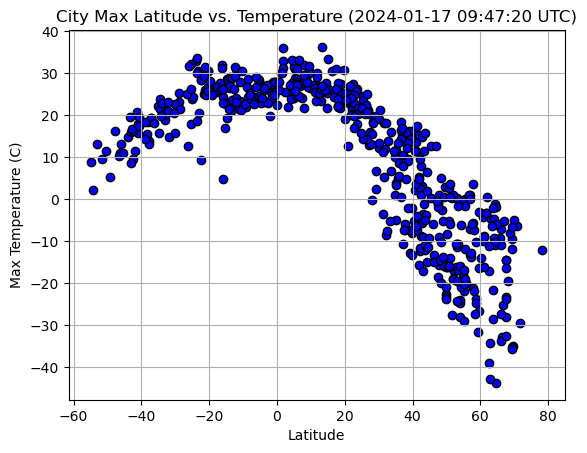

In [31]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker = 'o', facecolors = 'b', edgecolors = 'black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
date = city_data_df["Date"].min()

# Importing dependencies required to convert the data into readable format (sourced from Python 'datetime' module documentation)
from datetime import datetime

# Transforming timestamp to a dataframe object 
min_date_object = datetime.utcfromtimestamp(date)

# Formatting the datetime object as a string
formatted_date = min_date_object.strftime("%Y-%m-%d %H:%M:%S UTC")

# Finishing to plot the scatter
plt.title(f"City Max Latitude vs. Temperature ({formatted_date})")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

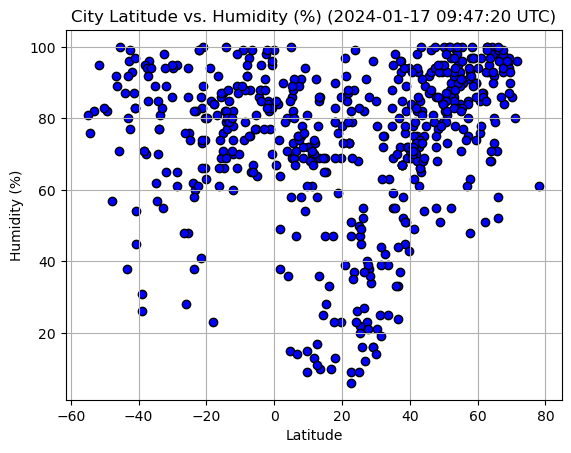

In [34]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker = 'o', facecolors = 'b', edgecolors = 'black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity (%) ({formatted_date})")
plt.grid()
 
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

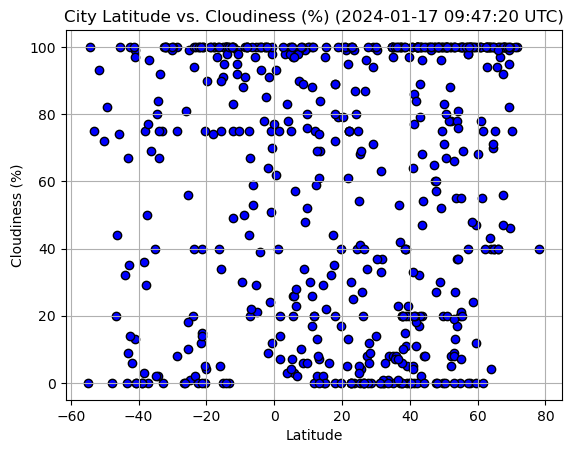

In [35]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker = 'o', facecolors = 'b', edgecolors = 'black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness (%) ({formatted_date})")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

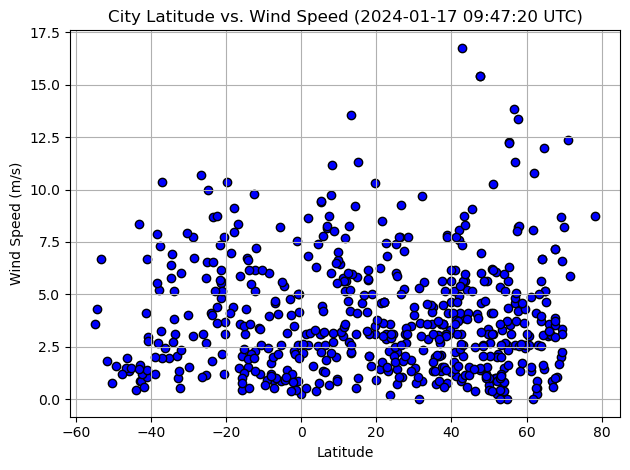

In [39]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker = 'o', facecolors = 'b', edgecolors = 'black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({formatted_date})")
plt.grid()
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [48]:
# Define a function to create Linear Regression plots
def linregress_plot(x, y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress = x * slope + intercept

    line_data = (f"y = {round(slope, 2)}x + {round(intercept, 2)}")

    print(f"The r-value is: {rvalue}")
    
    plt.scatter(x, y, marker = "o", color = "blue", edgecolor = "blue")
    plt.plot(x, regress, "r")
    plt.annotate(line_data, (x.min(), y.min()), color = 'r', fontsize = 15)
    plt.tight_layout()

In [45]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,inirida,3.8653,-67.9239,25.02,80,83,0.39,CO,1705485405
4,badger,64.8000,-147.5333,-5.86,80,40,5.14,US,1705485406
6,ribeira grande,38.5167,-28.7000,13.76,76,40,3.13,PT,1705485408
7,iskateley,67.6803,53.1512,-14.43,94,100,7.15,RU,1705485409
8,saudarkrokur,65.7461,-19.6394,-9.24,71,94,3.01,IS,1705485410


In [46]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,invercargill,-46.4000,168.3500,10.97,89,44,1.97,NZ,1705485403
1,puerto baquerizo moreno,-0.9000,-89.6000,24.66,84,75,2.59,EC,1705485404
3,avarua,-21.2078,-159.7750,26.03,83,40,5.66,CK,1705485405
5,adamstown,-25.0660,-130.1015,23.96,76,99,6.56,PN,1705485407
19,waitangi,-43.9535,-176.5597,14.90,87,32,0.45,NZ,1705485417


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8800565333050917


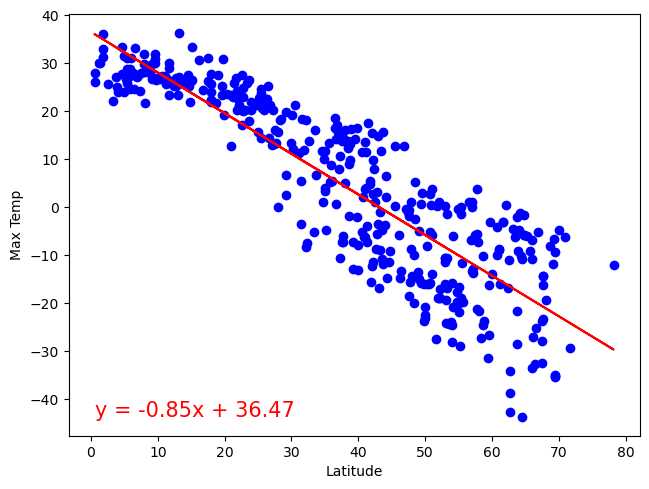

In [49]:
# Linear regression on Northern Hemisphere
linregress_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

# Plotting the titles
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()                


The r-value is: 0.671509150049733


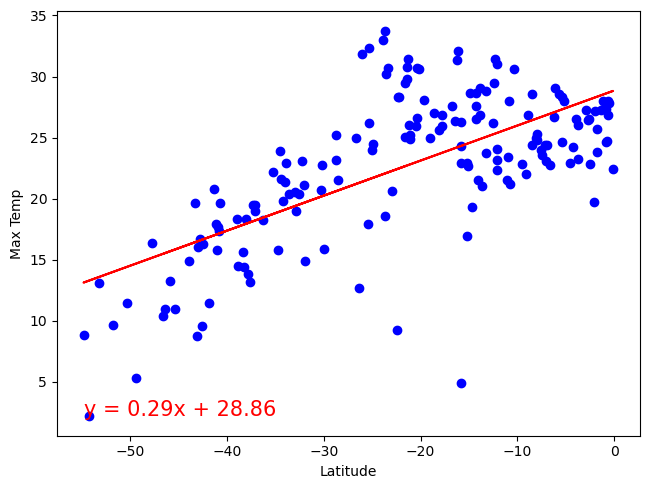

In [50]:
# Linear regression on Southern Hemisphere
linregress_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

# Plotting the titles
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()   

**Discussion about the linear relationship:** 

Northern Hemisphere - correlation coefficient indicates strong negative linear relationship between the distance from the equator and maximum temperature.

Southern Hemisphere - correlation coefficient indicates strong positive linear relationship between the distance from the equator and maximum temperature.

Temperatures increase as we get closer to the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4407763500509854


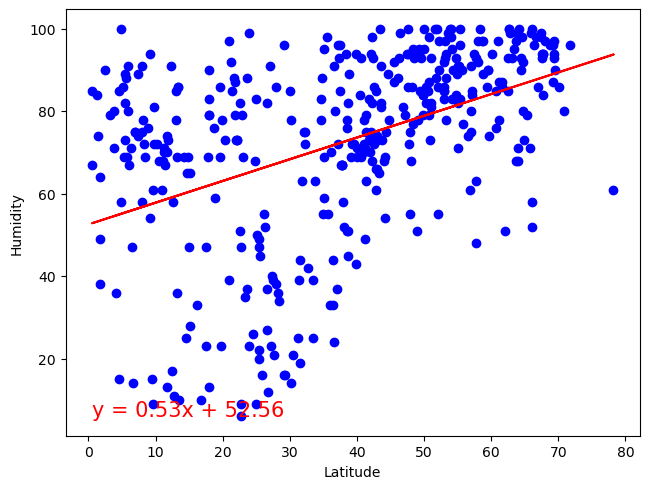

In [51]:
# Northern Hemisphere
linregress_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

# Plotting the titles
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()           

The r-value is: 0.1139397771290796


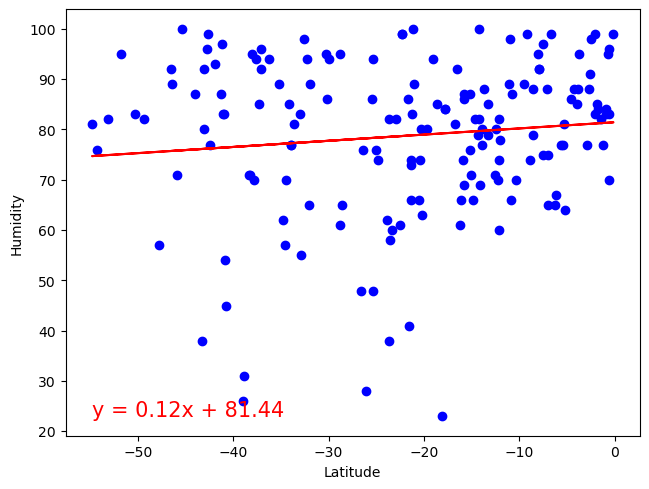

In [52]:
# Southern Hemisphere
linregress_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

# Plotting the titles
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()  

**Discussion about the linear relationship:**

Northern Hemisphere - correlation coefficient indicates average positive linear relationship between the distance from the equator and humidity indicating small relation between two values.

Though, based on a scatter plot - there is a very big relation between humidity and cities located very closely to the equator suggesting more studies could be beneficial for latitude of -10 to 10.
    
Southern Hemisphere - correlation coefficient indicates very weak positive linear relationship between the distance from the equator and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2033444803585753


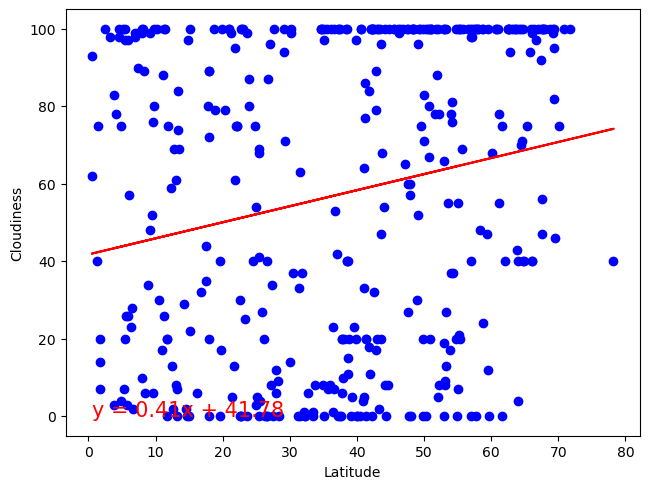

In [54]:
# Northern Hemisphere
linregress_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

# Plotting the titles
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()     

The r-value is: 0.2483232740829789


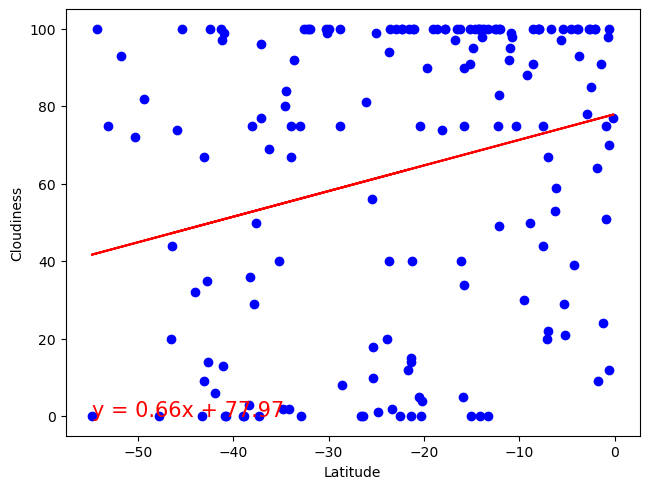

In [53]:
# Southern Hemisphere
linregress_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

# Plotting the titles
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()  

**Discussion about the linear relationship:** 

Northern Hemisphere - correlation coefficient indicates very weak positive linear relationship between the distance from the equator and cloudiness.

Southern Hemisphere - correlation coefficient indicates very weak positive linear relationship between the distance from the equator and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.03537589855664222


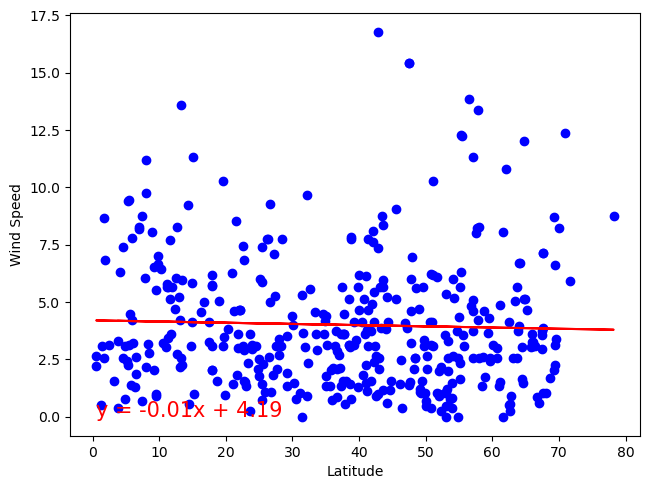

In [55]:
# Northern Hemisphere
linregress_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

# Plotting the titles
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()     

The r-value is: -0.023676857071142084


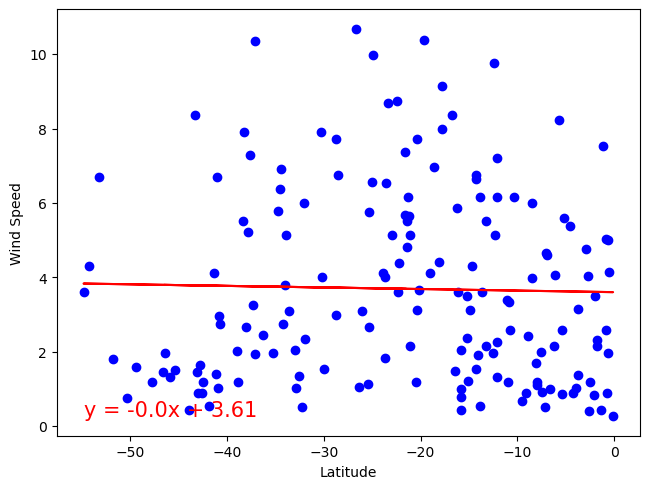

In [56]:
# Southern Hemisphere
linregress_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

# Plotting the titles
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()   

**Discussion about the linear relationship:** 

Northern Hemisphere - correlation coefficient indicates very weak negative linear relationship between the distance from the equator and the speed of the wind. 

Southern Hemisphere - correlation coefficient indicates very weak positive linear relationship between the distance from the equator and the speed of the wind.